In [34]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [21]:
# define state
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    strike_rate: float
    balls_per_boundary: float
    boundary_percent: float
    summary: str

create node functions

In [28]:
def calculate_sr(state: BatsmanState):
    sr = (state['runs'] / state['balls']) * 100
    return {"strike_rate": sr}

In [29]:
def calculate_bpb(state: BatsmanState):
    bpb = state['balls'] / (state['fours'] + state['sixes'])
    return {"balls_per_boundary": bpb}

In [30]:
def calculate_bp(state: BatsmanState):
    bp = (((state['fours'] * 4) + (state['sixes'] * 6)) / state['runs']) * 100
    return {"boundary_percent": bp}

In [31]:
def summary(state: BatsmanState):
    summary = f"""
Strike Rate: {state['strike_rate']}\n
Balls per Bpondary: {state['balls_per_boundary']}\n
Boundary Percent: {state['boundary_percent']}
"""
    return {"summary": summary}

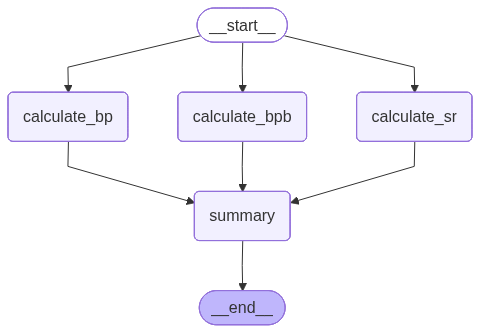

In [32]:
graph = StateGraph(BatsmanState)

# add nodes
graph.add_node("calculate_sr", calculate_sr)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_bp", calculate_bp)
graph.add_node("summary", summary)

# add edges
graph.add_edge(START, "calculate_sr")
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_bp")
graph.add_edge("calculate_sr", "summary")
graph.add_edge("calculate_bpb", "summary")
graph.add_edge("calculate_bp", "summary")
graph.add_edge("summary", END)

# compile graph
worlflow = graph.compile()

worlflow

In [33]:
initial_state = {"runs": 100, "balls": 50, "fours": 6, "sixes": 4}

final_state = worlflow.invoke(initial_state)

final_state

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'strike_rate': 200.0,
 'balls_per_boundary': 5.0,
 'boundary_percent': 48.0,
 'summary': '\nStrike Rate: 200.0\n\nBalls per Bpondary: 5.0\n\nBoundary Percent: 48.0\n'}